# 1. Importing pacakges

In [2]:
import pandas as pd
import numpy as np
import os
from IPython.display import clear_output
import xml.etree.ElementTree as ET
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
import torch
from sklearn.preprocessing import scale, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
from sklearn.neighbors import KNeighborsRegressor
import geopy.distance
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

## 2. Importing and vizualizing the data

In [3]:
wifi_and_loc_file = '../data/Processed/full_wifi_data_and_location_without_1.csv'

## 2.1. Getting details about df

In [4]:
df_wifi_and_loc_file = pd.read_csv(wifi_and_loc_file, index_col=0)
df_wifi_and_loc_file.sample(frac=1)
df_wifi_and_loc_file

,32:cd:a7:a0:6d:d8,84:b2:61:56:8a:01,84:b2:61:56:8a:02,84:b2:61:56:8a:00,84:b2:61:6d:3d:22,84:b2:61:6d:3d:21,84:b2:61:6d:3d:20,84:b2:61:5e:44:22,84:b2:61:5e:44:21,84:b2:61:5e:44:20,...,84:b2:61:6d:52:a1,84:b2:61:6d:52:a0,84:b2:61:6d:52:a2,84:b2:61:6d:52:af,84:b2:61:40:75:f1,84:b2:61:40:75:f2,84:b2:61:40:75:f0,c4:71:54:39:70:e4,lat,long
12:15:53:00,-39.0,-58.0,-58.0,-58.0,-70.0,-70.0,-70.0,-73.0,-73.0,-72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047613
12:15:54:00,-48.0,-51.0,-52.0,-52.0,-69.0,-71.0,-71.0,-74.0,-74.0,-74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047624
12:15:55:00,-45.0,-52.0,-52.0,-52.0,-72.0,-71.0,-71.0,-73.0,-73.0,-73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047637
12:15:56:00,-51.0,-42.0,-42.0,-42.0,-75.0,-72.0,-75.0,-79.0,-77.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047652
12:15:59:00,-50.0,-38.0,-37.0,-38.0,NaN,NaN,NaN,-61.0,-61.0,-62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19:09:23:00,-56.0,-55.0,-54.0,-55.0,-72.0,-72.0,-73.0,-71.0,-71.0,-71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,44.434937,26.047657
19:09:24:00,-49.0,-49.0,-49.0,-49.0,-74.0,-74.0,-74.0,-78.0,-77.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047642
19:09:25:00,-49.0,-55.0,-54.0,-54.0,-80.0,-80.0,-79.0,-79.0,-80.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047628
19:09:26:00,-46.0,-61.0,-61.0,-61.0,-72.0,-72.0,-72.0,-74.0,-74.0,-74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.434937,26.047614


In [5]:
# for i in range(3):
#     df_wifi_and_loc_file = pd.concat([df_wifi_and_loc_file, df_wifi_and_loc_file], axis=0)
# df_wifi_and_loc_file.sample(frac=1)
# df_wifi_and_loc_file

In [6]:
df_wifi_and_loc_file.dtypes

32:cd:a7:a0:6d:d8    float64
84:b2:61:56:8a:01    float64
84:b2:61:56:8a:02    float64
84:b2:61:56:8a:00    float64
84:b2:61:6d:3d:22    float64
84:b2:61:6d:3d:21    float64
84:b2:61:6d:3d:20    float64
84:b2:61:5e:44:22    float64
84:b2:61:5e:44:21    float64
84:b2:61:5e:44:20    float64
84:b2:61:47:dd:42    float64
84:b2:61:47:dd:41    float64
84:b2:61:47:dd:40    float64
84:b2:61:47:e2:c0    float64
84:b2:61:56:8a:0f    float64
84:b2:61:56:8a:0e    float64
84:b2:61:56:8a:0d    float64
84:b2:61:5e:44:2f    float64
84:b2:61:5e:44:2d    float64
84:b2:61:6d:3d:2e    float64
84:b2:61:5e:44:2e    float64
84:b2:61:6d:3d:2d    float64
84:b2:61:6d:3d:2f    float64
84:b2:61:47:dd:4e    float64
84:b2:61:47:dd:4f    float64
84:b2:61:47:dd:4d    float64
84:b2:61:47:e2:c2    float64
84:b2:61:47:e2:c1    float64
84:b2:61:6d:5d:70    float64
84:b2:61:6d:5d:72    float64
84:b2:61:6d:5d:71    float64
84:b2:61:47:e2:ce    float64
84:b2:61:47:e2:cd    float64
84:b2:61:6d:52:a1    float64
84:b2:61:6d:52

In [7]:
df_wifi_and_loc_file.columns

Index(['32:cd:a7:a0:6d:d8', '84:b2:61:56:8a:01', '84:b2:61:56:8a:02',
       '84:b2:61:56:8a:00', '84:b2:61:6d:3d:22', '84:b2:61:6d:3d:21',
       '84:b2:61:6d:3d:20', '84:b2:61:5e:44:22', '84:b2:61:5e:44:21',
       '84:b2:61:5e:44:20', '84:b2:61:47:dd:42', '84:b2:61:47:dd:41',
       '84:b2:61:47:dd:40', '84:b2:61:47:e2:c0', '84:b2:61:56:8a:0f',
       '84:b2:61:56:8a:0e', '84:b2:61:56:8a:0d', '84:b2:61:5e:44:2f',
       '84:b2:61:5e:44:2d', '84:b2:61:6d:3d:2e', '84:b2:61:5e:44:2e',
       '84:b2:61:6d:3d:2d', '84:b2:61:6d:3d:2f', '84:b2:61:47:dd:4e',
       '84:b2:61:47:dd:4f', '84:b2:61:47:dd:4d', '84:b2:61:47:e2:c2',
       '84:b2:61:47:e2:c1', '84:b2:61:6d:5d:70', '84:b2:61:6d:5d:72',
       '84:b2:61:6d:5d:71', '84:b2:61:47:e2:ce', '84:b2:61:47:e2:cd',
       '84:b2:61:6d:52:a1', '84:b2:61:6d:52:a0', '84:b2:61:6d:52:a2',
       '84:b2:61:6d:52:af', '84:b2:61:40:75:f1', '84:b2:61:40:75:f2',
       '84:b2:61:40:75:f0', 'c4:71:54:39:70:e4', 'lat', 'long'],
      dtype='object')

## 2.2. Vizualizing raw data from wifi and data concatenated file, without the first file (it had many outliers)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


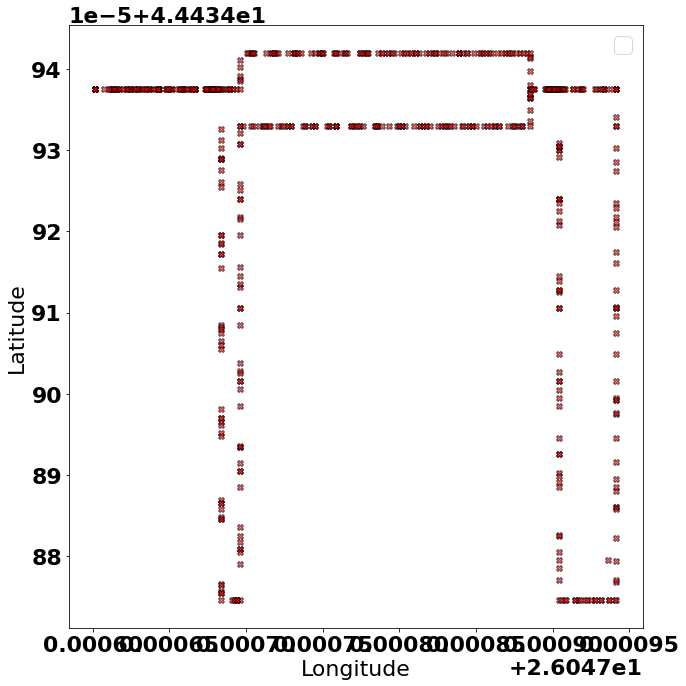

In [8]:
markers = ('s', 'X', 'o')
colors = ('red', 'yellow', 'lightgreen')
cmap = ListedColormap(colors[:1])


fig = plt.figure(figsize=(10,10))
plt.scatter(x=df_wifi_and_loc_file['long'], 
            y=df_wifi_and_loc_file['lat'],
            alpha=0.6, 
            c=[cmap(1)],
            edgecolor='black',
            marker=markers[1])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.tight_layout()

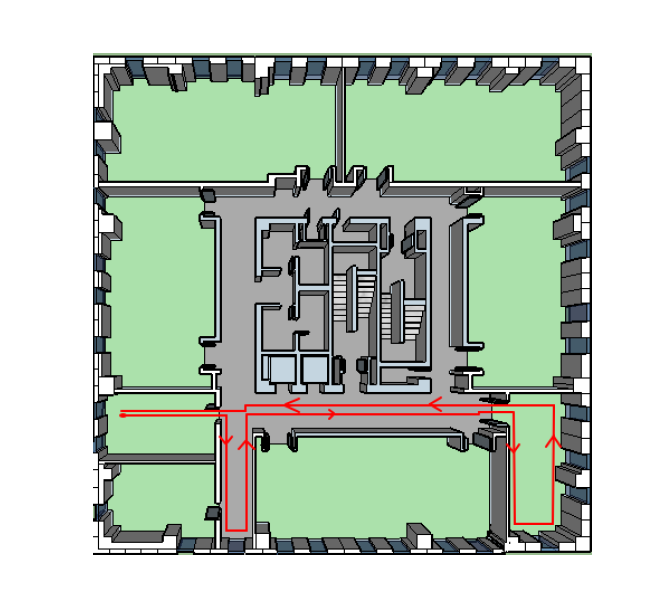

In [9]:
wifi_and_loc_file1 = '../data/Processed/wifi_data_and_location_1.csv'
wifi_and_loc_file2 = '../data/Processed/wifi_data_and_location_2.csv'
wifi_and_loc_file3 = '../data/Processed/wifi_data_and_location_3.csv'
wifi_and_loc_file4 = '../data/Processed/wifi_data_and_location_4.csv'
wifi_and_loc_file5 = '../data/Processed/wifi_data_and_location_5.csv'
wifi_and_loc_file6 = '../data/Processed/wifi_data_and_location_6.csv'
wifi_and_loc_file7 = '../data/Processed/wifi_data_and_location_7.csv'
wifi_and_loc_file8 = '../data/Processed/wifi_data_and_location_8.csv'

df_wifi_and_loc_file1 = pd.read_csv(wifi_and_loc_file1, index_col=0)
df_wifi_and_loc_file2 = pd.read_csv(wifi_and_loc_file2, index_col=0)
df_wifi_and_loc_file3 = pd.read_csv(wifi_and_loc_file3, index_col=0)
df_wifi_and_loc_file4 = pd.read_csv(wifi_and_loc_file4, index_col=0)
df_wifi_and_loc_file5 = pd.read_csv(wifi_and_loc_file5, index_col=0)
df_wifi_and_loc_file6 = pd.read_csv(wifi_and_loc_file6, index_col=0)
df_wifi_and_loc_file7 = pd.read_csv(wifi_and_loc_file7, index_col=0)
df_wifi_and_loc_file8 = pd.read_csv(wifi_and_loc_file8, index_col=0)

Text(0.5, 0, 'Latitude')

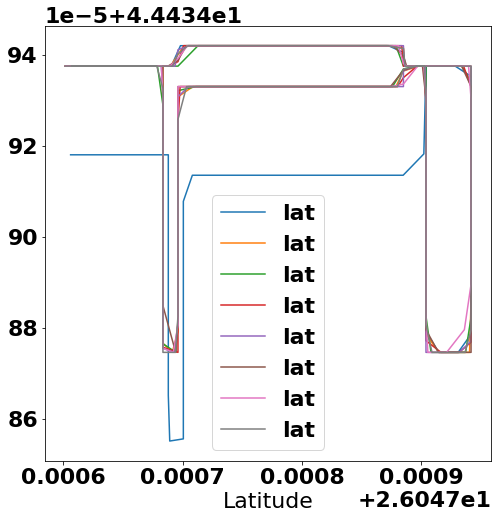

In [10]:
ax = df_wifi_and_loc_file1.plot(x='long', y='lat', figsize=(8, 8))
df_wifi_and_loc_file2.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file3.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file4.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file5.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file6.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file7.plot(ax=ax, x='long', y='lat')
df_wifi_and_loc_file8.plot(ax=ax, x='long', y='lat')

plt.xlabel('Longitude')
plt.xlabel('Latitude')

# The first file is different than the rest, too many outliers, we eliminate it

## 2.3. Normalizing lat and longitude

In [11]:
# Function to normalize a column using Min-Max normalization
def normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized = (column - min_val) / (max_val - min_val)
    return normalized

In [12]:
max_lat = df_wifi_and_loc_file['lat'].max()
min_lat = df_wifi_and_loc_file['lat'].min()
max_long = df_wifi_and_loc_file['long'].max()
min_long = df_wifi_and_loc_file['long'].min()
df_wifi_and_loc_file['normalized_lat'] = normalize(df_wifi_and_loc_file['lat'])
df_wifi_and_loc_file['normalized_long'] = normalize(df_wifi_and_loc_file['long'])

## 2.4. Vizualizing normalized lat and longitude

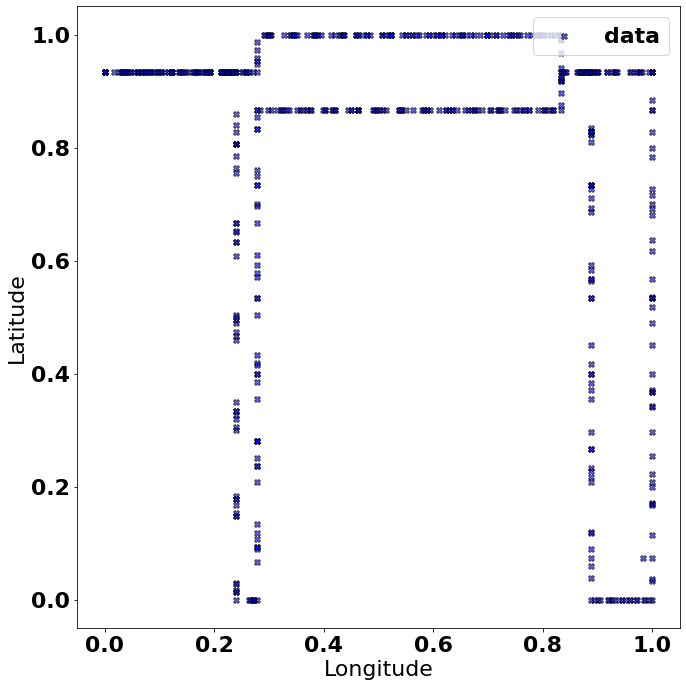

In [13]:
markers = ('s', 'X', 'o')
colors = ('blue', 'yellow', 'lightgreen')
cmap = ListedColormap(colors[:1])


fig = plt.figure(figsize=(10,10))
plt.scatter(x=df_wifi_and_loc_file['normalized_long'], 
            y=df_wifi_and_loc_file['normalized_lat'],
            alpha=0.6, 
            c=[cmap(1)],
            edgecolor='black',
            marker=markers[1], 
            label='data')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.tight_layout()

## 2.4. Filling the NaN values with -100 db

In [14]:
df_wifi_and_loc_file.fillna(-100, inplace=True)

## 2.5. Attributing the values to rooms

In [15]:
df_wifi_and_loc_file['room'] = np.nan

df_wifi_and_loc_file.loc[(df_wifi_and_loc_file['normalized_long'] <= 0.2), 'room'] = 0
df_wifi_and_loc_file.loc[(df_wifi_and_loc_file['normalized_long'] > 0.2) &
                         (df_wifi_and_loc_file['normalized_long'] <= 0.3), 'room'] = 1
df_wifi_and_loc_file.loc[(df_wifi_and_loc_file['normalized_long'] > 0.3) &
                         (df_wifi_and_loc_file['normalized_long'] < 0.85), 'room'] = 2
df_wifi_and_loc_file.loc[(df_wifi_and_loc_file['normalized_long'] >= 0.85), 'room'] = 3
df_wifi_and_loc_file

,32:cd:a7:a0:6d:d8,84:b2:61:56:8a:01,84:b2:61:56:8a:02,84:b2:61:56:8a:00,84:b2:61:6d:3d:22,84:b2:61:6d:3d:21,84:b2:61:6d:3d:20,84:b2:61:5e:44:22,84:b2:61:5e:44:21,84:b2:61:5e:44:20,...,84:b2:61:6d:52:af,84:b2:61:40:75:f1,84:b2:61:40:75:f2,84:b2:61:40:75:f0,c4:71:54:39:70:e4,lat,long,normalized_lat,normalized_long,room
12:15:53:00,-39.0,-58.0,-58.0,-58.0,-70.0,-70.0,-70.0,-73.0,-73.0,-72.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047613,0.933334,0.032408,0.0
12:15:54:00,-48.0,-51.0,-52.0,-52.0,-69.0,-71.0,-71.0,-74.0,-74.0,-74.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047624,0.933334,0.066667,0.0
12:15:55:00,-45.0,-52.0,-52.0,-52.0,-72.0,-71.0,-71.0,-73.0,-73.0,-73.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047637,0.933334,0.103704,0.0
12:15:56:00,-51.0,-42.0,-42.0,-42.0,-75.0,-72.0,-75.0,-79.0,-77.0,-79.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047652,0.933334,0.148148,0.0
12:15:59:00,-50.0,-38.0,-37.0,-38.0,-100.0,-100.0,-100.0,-61.0,-61.0,-62.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047674,0.933334,0.212005,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19:09:23:00,-56.0,-55.0,-54.0,-55.0,-72.0,-72.0,-73.0,-71.0,-71.0,-71.0,...,-100.0,-100.0,-100.0,-100.0,-96.0,44.434937,26.047657,0.933333,0.162963,0.0
19:09:24:00,-49.0,-49.0,-49.0,-49.0,-74.0,-74.0,-74.0,-78.0,-77.0,-78.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047642,0.933333,0.120370,0.0
19:09:25:00,-49.0,-55.0,-54.0,-54.0,-80.0,-80.0,-79.0,-79.0,-80.0,-79.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047628,0.933333,0.078189,0.0
19:09:26:00,-46.0,-61.0,-61.0,-61.0,-72.0,-72.0,-72.0,-74.0,-74.0,-74.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,44.434937,26.047614,0.933333,0.037037,0.0


C:\Users\Enachele\AppData\Local\Temp\ipykernel_11128\480135349.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=df_wifi_and_loc_file.loc[df_wifi_and_loc_file.room== cl]['normalized_long'],


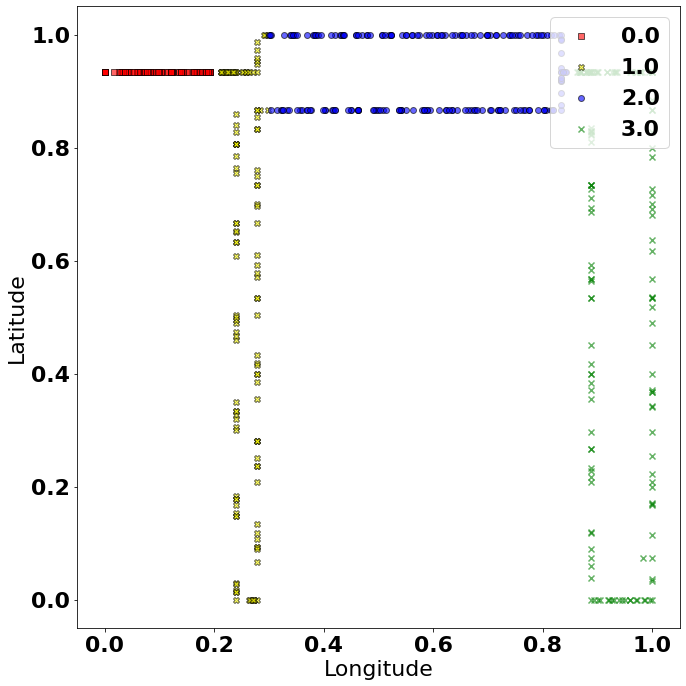

In [16]:
markers = ('s', 'X', 'o', 'x')
colors = ('red', 'yellow', 'blue', 'green')
cmap = ListedColormap(colors[:len(np.unique(df_wifi_and_loc_file['room']))])


fig = plt.figure(figsize=(10,10))
for idx, cl in enumerate(np.unique(df_wifi_and_loc_file['room'])):
        plt.scatter(x=df_wifi_and_loc_file.loc[df_wifi_and_loc_file.room== cl]['normalized_long'], 
                    y=df_wifi_and_loc_file.loc[df_wifi_and_loc_file.room== cl]['normalized_lat'],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.tight_layout()

# 3. Data preprocessing

## 3.1. Splitting data in labels and target for the first DNN (Step 1)

In [17]:
X = df_wifi_and_loc_file.iloc[:, :41].values
y = df_wifi_and_loc_file['room'].values
X, y

(array([[ -39.,  -58.,  -58., ..., -100., -100., -100.],
        [ -48.,  -51.,  -52., ..., -100., -100., -100.],
        [ -45.,  -52.,  -52., ..., -100., -100., -100.],
        ...,
        [ -49.,  -55.,  -54., ..., -100., -100., -100.],
        [ -46.,  -61.,  -61., ..., -100., -100., -100.],
        [ -46.,  -61.,  -61., ..., -100., -100., -100.]]),
 array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 1., 1., 1., 0.,

## 3.2. Splitting the dataset in Training and Test set

In [18]:
val_limit = int(len(df_wifi_and_loc_file)*0.9)

X_val = X[val_limit:, :]
y_val = y[val_limit:]

X = X[:val_limit, :]
y = y[:val_limit]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((333, 41), (144, 41), (53, 41), (333,), (144,), (53,))

In [19]:
print(X_train)
print('X_train number of values: ', len(X_train))

[[ -68.  -49.  -49. ... -100. -100. -100.]
 [ -61.  -46.  -46. ... -100. -100. -100.]
 [ -84.  -80.  -79. ... -100. -100. -100.]
 ...
 [ -85.  -81.  -80. ... -100. -100. -100.]
 [ -70.  -66.  -66. ... -100. -100. -100.]
 [ -77.  -80.  -80. ... -100. -100. -100.]]
X_train number of values:  333


## 3.3. Features scaling

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
X_val = sc.transform(X_val)
X_train, X_test, X_val

(array([[-0.18074807,  0.90458361,  0.90867257, ..., -0.06211824,
         -0.06211824, -0.09361297],
        [ 0.38101693,  1.12932348,  1.13431609, ..., -0.06211824,
         -0.06211824, -0.09361297],
        [-1.46478236, -1.4177284 , -1.34776267, ..., -0.06211824,
         -0.06211824, -0.09361297],
        ...,
        [-1.54503451, -1.49264169, -1.42297718, ..., -0.06211824,
         -0.06211824, -0.09361297],
        [-0.34125236, -0.36894233, -0.36997407, ..., -0.06211824,
         -0.06211824, -0.09361297],
        [-0.90301736, -1.4177284 , -1.42297718, ..., -0.06211824,
         -0.06211824, -0.09361297]]),
 array([[ 1.02303408,  0.38019057,  0.38217101, ..., -0.06211824,
         -0.06211824, -0.09361297],
        [ 0.62177336,  1.12932348,  1.13431609, ..., -0.06211824,
         -0.06211824, -0.09361297],
        [-0.50175664, -0.06928917, -0.21954505, ..., 10.28056905,
         10.28056905, -0.09361297],
        ...,
        [ 0.1402605 ,  0.53001715,  0.53260003, ..., -

In [21]:
X_train.shape

(333, 41)

In [22]:
y_train.shape

(333,)

# 4. Building the first DNN model

### 4.1. Initializing the NN

In [23]:
nn = Sequential()

### 4.2. Adding the input layer and the first hidden layer

In [24]:
# Adding a fully-connected layer (it automatically create the input layer)
# num of neurons = num of features (41 APs)
input_size = 41
nn.add(Dense(input_dim=input_size, units=256, activation='relu'))

### 4.3. Adding the second layer

In [25]:
# Adding a layer with 128 neurons
nn.add(Dense(units=128, activation='relu'))

### 4.4. Adding the output layer

In [26]:
# sotmax for > 2 categories
classes = 4 # number of rooms
nn.add(Dense(units=classes, activation='softmax'))

# 5. Training the DNN

### 5.1. Compiling the DNN

In [27]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [28]:
# Optimizer = Adam ==> Stochastic Gradient Descent
nn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

### 5.2. Training the NN on the Training set

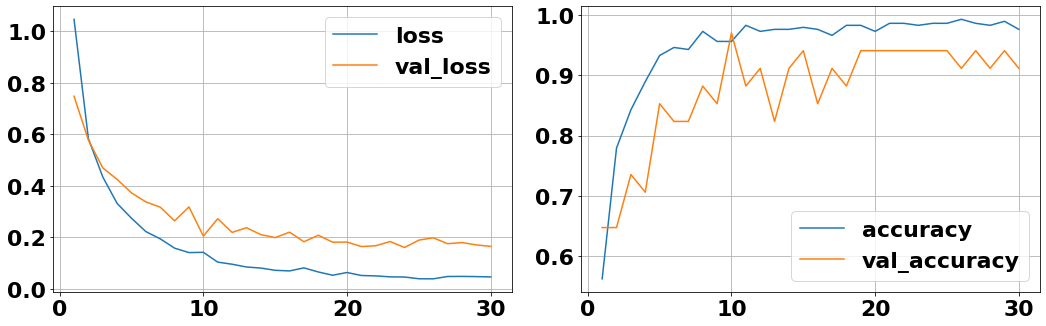

10/10 [==============================] - 0s 33ms/step - loss: 0.0461 - accuracy: 0.9766 - val_loss: 0.1648 - val_accuracy: 0.9118


In [29]:
nn.fit(X_train, 
       y_train, 
       batch_size=32, 
       epochs=30, 
       validation_split=0.1, 
       callbacks=[PlotLearning()])

# 6. Making predictions and evaluating the model

### 6.1. Predicting the test results

In [30]:
y_pred = nn.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [31]:
y_pred

array([[1.60855798e-05, 9.97197151e-01, 2.78557534e-03, 1.24354335e-06],
       [1.25252865e-02, 9.79677737e-01, 7.79455807e-03, 2.43058980e-06],
       [4.41442682e-16, 7.04504854e-09, 1.00000000e+00, 2.50220885e-14],
       [2.22691342e-05, 1.85727782e-04, 3.26907233e-04, 9.99465048e-01],
       [7.35690992e-04, 8.98473322e-01, 1.00605696e-01, 1.85262412e-04],
       [5.12380360e-09, 9.99982834e-01, 1.71820338e-05, 9.12068268e-11],
       [1.64797007e-06, 1.52252860e-05, 5.05765856e-05, 9.99932528e-01],
       [4.01069061e-04, 1.97753474e-01, 8.01837623e-01, 7.77258356e-06],
       [2.52204245e-05, 7.52321212e-05, 2.88032065e-03, 9.97019291e-01],
       [7.22988852e-06, 7.76663146e-05, 9.99735892e-01, 1.79175506e-04],
       [9.94394302e-01, 5.15186088e-03, 4.34363377e-04, 1.95284356e-05],
       [1.40204190e-06, 9.99872327e-01, 1.26198895e-04, 4.42714176e-09],
       [9.97870803e-01, 8.77049577e-04, 1.24319794e-03, 8.95174617e-06],
       [1.11325996e-07, 9.99698877e-01, 3.00873769e

In [32]:
y_pred.shape

(144, 4)

#### 6.1.1. Transforming the encoded data back to room number

In [33]:
# tf argmax returns the index of the largest value in the tensor
room_pred = tf.argmax(y_pred, axis=1)
# This connects to keras backend -- why is here though?
# room_pred = tf.keras.backend.eval(room_pred)
# print(room_pred)

In [34]:
room_pred

<tf.Tensor: shape=(144,), dtype=int64, numpy=
array([1, 1, 2, 3, 1, 1, 3, 2, 3, 2, 0, 1, 0, 1, 2, 1, 3, 2, 0, 3, 0, 2,
       1, 3, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 3, 2, 1, 1, 3, 1, 2, 2, 3,
       3, 0, 2, 1, 1, 3, 3, 1, 2, 1, 2, 2, 3, 0, 1, 3, 3, 3, 1, 3, 3, 1,
       0, 2, 2, 1, 2, 3, 2, 3, 2, 2, 2, 0, 2, 3, 0, 2, 2, 3, 2, 2, 2, 1,
       1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 0, 1, 2, 2, 1, 0, 3, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 3, 1, 3, 0, 2, 0, 2, 3, 1, 1, 0, 1,
       2, 2, 3, 2, 0, 2, 0, 1, 3, 2, 2, 1], dtype=int64)>

### 6.2. Making the confusion matrix and calculating Accuracy 

In [35]:
cm = confusion_matrix(y_test, room_pred)
print(cm)
accuracy = accuracy_score(y_test, room_pred)
print('Accuracy: ', accuracy)

[[17  0  0  0]
 [ 1 41  4  0]
 [ 0  0 49  3]
 [ 0  0  1 28]]
Accuracy:  0.9375


In [36]:
print(classification_report(y_test, room_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.89      0.94        46
         2.0       0.91      0.94      0.92        52
         3.0       0.90      0.97      0.93        29

    accuracy                           0.94       144
   macro avg       0.94      0.95      0.94       144
weighted avg       0.94      0.94      0.94       144



### 6.3. Predicting with the Validation set

In [37]:
X_val = sc.fit_transform(X_val)

In [38]:
y_pred_val = nn.predict(X_val)
y_pred_val

2/2 [==============================] - 0s 2ms/step


array([[3.45835019e-07, 4.34692220e-06, 9.99874234e-01, 1.21077115e-04],
       [1.36810982e-07, 1.98973498e-06, 9.99526143e-01, 4.71721869e-04],
       [1.29625846e-06, 5.08690482e-06, 9.86902714e-01, 1.30908424e-02],
       [1.87544010e-05, 3.54629556e-05, 9.98830259e-01, 1.11546589e-03],
       [2.25677827e-11, 1.81250375e-08, 1.00000000e+00, 1.48869847e-10],
       [5.23158560e-05, 1.11851485e-04, 9.97400284e-01, 2.43559456e-03],
       [1.27372948e-06, 8.72790133e-06, 9.98811722e-01, 1.17827021e-03],
       [2.35412081e-04, 1.42914278e-03, 8.28264654e-01, 1.70070872e-01],
       [2.35412081e-04, 1.42914278e-03, 8.28264654e-01, 1.70070872e-01],
       [5.09498874e-04, 7.14771217e-04, 7.36545026e-02, 9.25121248e-01],
       [1.16210744e-04, 9.56029259e-03, 3.29447575e-02, 9.57378745e-01],
       [8.22267320e-04, 4.70915023e-04, 5.01251929e-02, 9.48581755e-01],
       [5.16026012e-05, 9.75488976e-04, 6.66806998e-04, 9.98306036e-01],
       [1.04950035e-04, 1.60266794e-02, 3.26150283e

In [39]:
y_pred_val.shape

(53, 4)

In [40]:
room_pred_val = tf.argmax(y_pred_val, axis=1)
room_pred_val = tf.keras.backend.eval(room_pred_val)

In [41]:
room_pred_val

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
cm = confusion_matrix(y_val, room_pred_val)
print(cm)
accuracy = accuracy_score(y_val, room_pred_val)
print('Accuracy: ', accuracy)

[[ 6  0  0  0]
 [ 0  3  0  0]
 [ 0  2 20  0]
 [ 0  0  1 21]]
Accuracy:  0.9433962264150944


In [43]:
print(classification_report(y_val, room_pred_val))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.60      1.00      0.75         3
         2.0       0.95      0.91      0.93        22
         3.0       1.00      0.95      0.98        22

    accuracy                           0.94        53
   macro avg       0.89      0.97      0.91        53
weighted avg       0.96      0.94      0.95        53



## 7. Building the KNN regressor

### 7.1. Creating the second training dataset

#### 7.1.1. Selecting the cluster to which out values correspond to (the room)

In [44]:
room = 3
# floor = floor_pred_valid[0] # TODO: verify how can we change this so it gets the room by default
mask = df_wifi_and_loc_file['room'] == room

In [45]:
df_ap = df_wifi_and_loc_file.iloc[:, :41][mask]
df_floor = df_wifi_and_loc_file['room'][mask]
df_floor, df_ap

(12:16:33:01    3.0
 12:16:34:00    3.0
 12:16:36:00    3.0
 12:16:37:00    3.0
 12:16:38:00    3.0
               ... 
 19:08:54:01    3.0
 19:08:55:00    3.0
 19:08:56:00    3.0
 19:08:57:00    3.0
 19:08:58:00    3.0
 Name: room, Length: 143, dtype: float64,
              32:cd:a7:a0:6d:d8  84:b2:61:56:8a:01  84:b2:61:56:8a:02  \
 12:16:33:01              -72.0              -62.0              -62.0   
 12:16:34:00              -70.0              -70.0              -72.0   
 12:16:36:00              -76.0              -69.0              -66.0   
 12:16:37:00              -74.0              -67.0              -69.0   
 12:16:38:00              -76.0              -76.0              -76.0   
 ...                        ...                ...                ...   
 19:08:54:01              -81.0              -82.0              -81.0   
 19:08:55:00              -74.0              -65.0              -64.0   
 19:08:56:00              -74.0              -65.0              -64.0   
 19:08:5

In [46]:
X_step_2 = pd.concat([df_ap, df_floor], axis=1).values
y_step_2 = df_wifi_and_loc_file[['lat', 'long']][mask].values

In [47]:
X_step_2

array([[ -72.,  -62.,  -62., ..., -100., -100.,    3.],
       [ -70.,  -70.,  -72., ..., -100., -100.,    3.],
       [ -76.,  -69.,  -66., ..., -100., -100.,    3.],
       ...,
       [ -74.,  -65.,  -64., ..., -100., -100.,    3.],
       [ -66.,  -60.,  -60., ..., -100., -100.,    3.],
       [ -66.,  -60.,  -60., ..., -100., -100.,    3.]])

In [48]:
y_step_2

array([[44.4349375 , 26.04789753],
       [44.4349375 , 26.0479032 ],
       [44.43493007, 26.04790377],
       [44.4349208 , 26.04790377],
       [44.43491052, 26.04790377],
       [44.43489953, 26.04790377],
       [44.43488916, 26.04790377],
       [44.43487854, 26.04790377],
       [44.43487455, 26.04791457],
       [44.43487455, 26.0479277 ],
       [44.43487455, 26.0479403 ],
       [44.43488599, 26.04794156],
       [44.43489453, 26.04794156],
       [44.4349049 , 26.04794156],
       [44.43491614, 26.04794156],
       [44.43492738, 26.04794156],
       [44.4349375 , 26.04794143],
       [44.4349375 , 26.04792826],
       [44.4349375 , 26.04791322],
       [44.4349375 , 26.04789748],
       [44.4349375 , 26.04789468],
       [44.4349375 , 26.04790377],
       [44.43493001, 26.04790377],
       [44.43492251, 26.04790377],
       [44.43491252, 26.04790377],
       [44.43490153, 26.04790377],
       [44.43489253, 26.04790377],
       [44.43488254, 26.04790377],
       [44.43487455,

### 7.2. Splitting the data in Train and Test

In [49]:
X_train_step_2, X_test_step_2, y_train_step_2, y_test_step_2 = train_test_split(X_step_2,
                                                                                y_step_2, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0)

In [50]:
X_train_step_2

array([[ -80., -100., -100., ..., -100., -100.,    3.],
       [ -76.,  -69.,  -66., ..., -100., -100.,    3.],
       [ -85.,  -76.,  -76., ..., -100., -100.,    3.],
       ...,
       [ -85.,  -72.,  -72., ..., -100., -100.,    3.],
       [ -86.,  -87.,  -86., ..., -100., -100.,    3.],
       [ -79.,  -71.,  -71., ..., -100., -100.,    3.]])

In [51]:
len(X_train_step_2)

114

In [52]:
len(X_test_step_2)

29

### 7.3. Building the model

In [53]:
knn_regressor = KNeighborsRegressor(n_neighbors=4, weights='distance')
knn_regressor.fit(X_train_step_2, y_train_step_2)

KNeighborsRegressor(n_neighbors=4, weights='distance')

### 7.4. Making predictions and evaluating the model

In [54]:
y_pred_step_2 = knn_regressor.predict(X_test_step_2)
y_pred_step_2

array([[44.43489467, 26.04790535],
       [44.4349375 , 26.04792616],
       [44.43493715, 26.04794137],
       [44.4349375 , 26.04791794],
       [44.43493048, 26.04790377],
       [44.43487877, 26.04790377],
       [44.4348812 , 26.04791746],
       [44.43489652, 26.04794156],
       [44.43487455, 26.04792498],
       [44.4349375 , 26.04790553],
       [44.43491061, 26.04794156],
       [44.43488823, 26.04790792],
       [44.43487455, 26.04790938],
       [44.43493591, 26.04794118],
       [44.4349375 , 26.04793183],
       [44.43488282, 26.04794156],
       [44.43492272, 26.04790377],
       [44.4349375 , 26.04790908],
       [44.4349375 , 26.04790908],
       [44.43490693, 26.04790377],
       [44.43492164, 26.04790377],
       [44.43489949, 26.047912  ],
       [44.4349375 , 26.04789719],
       [44.43489293, 26.04790377],
       [44.43492979, 26.04790377],
       [44.4349375 , 26.04789748],
       [44.4348934 , 26.04793208],
       [44.43490054, 26.04790377],
       [44.43490546,

In [55]:
y_test_step_2

array([[44.43489853, 26.04790377],
       [44.4349375 , 26.0479277 ],
       [44.4349375 , 26.04794143],
       [44.4349375 , 26.04793526],
       [44.43493001, 26.04790377],
       [44.43487854, 26.04790377],
       [44.43488264, 26.04790377],
       [44.43489928, 26.04794156],
       [44.43487455, 26.04792267],
       [44.4349375 , 26.04789676],
       [44.43491063, 26.04794156],
       [44.43488984, 26.04790377],
       [44.43487455, 26.04791457],
       [44.434933  , 26.04794156],
       [44.4349375 , 26.04791987],
       [44.43490153, 26.04794156],
       [44.43492401, 26.04790377],
       [44.4349375 , 26.04789748],
       [44.4349375 , 26.04791322],
       [44.43491252, 26.04790377],
       [44.43492401, 26.04790377],
       [44.43490153, 26.04790377],
       [44.4349375 , 26.04789534],
       [44.43489253, 26.04790377],
       [44.43493046, 26.04790377],
       [44.4349375 , 26.04791322],
       [44.43489953, 26.04794156],
       [44.4349049 , 26.04790377],
       [44.43491052,

In [56]:
y_pred_step_2.shape, y_test_step_2.shape

((29, 2), (29, 2))

In [57]:
print(mean_squared_error(y_test_step_2, y_pred_step_2))

3.1615486191472946e-11


In [58]:
print(mean_squared_error(y_test_step_2, y_pred_step_2, multioutput='raw_values'))

[1.76381344e-11 4.55928380e-11]


In [59]:
y_pred_step_2 = pd.DataFrame(y_pred_step_2, columns=['lat1', 'long1'])
y_test_step_2 = pd.DataFrame(y_test_step_2, columns=['lat2', 'long2'])

# alculating the Euclidian distance between points
distance_df = pd.DataFrame((y_test_step_2['lat2']-y_pred_step_2['lat1'])**2 + 
                           (y_test_step_2['long2']-y_pred_step_2['long1'])**2)**(1/2)
sum_dist = distance_df.sum()
mean_error = sum_dist/len(distance_df)
mean_error

0    0.000006
dtype: float64

In [60]:
from math import radians, cos, sin, asin, acos, sqrt, pi
import geopy.distance

def calculate_spherical_distance(row):
    " Calculates the distance in km with the haversine method, which assumes the earth is sphere"
    lat1 = row['lat1']
    lon1 = row['long1']
    lat2 = row['lat2']
    lon2 = row['long2']
    r=6371
    # Convert degrees to radians
    coordinates = lat1, lon1, lat2, lon2
    phi1, lambda1, phi2, lambda2 = [
        radians(c) for c in coordinates
    ]
    
    # Apply the haversine formula
    d = r*acos(cos(phi2-phi1) - cos(phi1) * cos(phi2) *
              (1-cos(lambda2-lambda1)))
    return d

def calculate_vincenty_distance(row):
    coords_1 = (row['lat1'], row['long1'])
    coords_2 = (row['lat2'], row['long2'])
    
    return geopy.distance.geodesic(coords_1, coords_2).km

In [61]:
df_final = pd.DataFrame()
df_final = pd.concat([y_pred_step_2, y_test_step_2], axis=1)

df_final['km_difference_haversine'] = df_final.apply(calculate_spherical_distance, axis=1)
df_final['m_difference_haversine'] = df_final['km_difference_haversine']*1000

df_final['km_difference_vincenty'] = df_final.apply(calculate_vincenty_distance, axis=1)
df_final['m_difference_vincenty'] = df_final['km_difference_vincenty']*1000

# Transform all the differences in positive values for Standard Deviation
df_final['m_difference_haversine_module']=np.sqrt(df_final['m_difference_haversine']*df_final['m_difference_haversine'])
df_final['m_difference_vincenty_module']=np.sqrt(df_final['m_difference_vincenty']*df_final['m_difference_vincenty'])

# Mean Squared Error Haversine
mse_h = (df_final['m_difference_haversine']*df_final['m_difference_haversine']).sum()/len(df_final)
print(f'Mean Squared Error for Haversine is: {mse_h} m^2')
# Root Mean Squared Error Haversine
rmse_h = np.sqrt(mse_h)
print(f'Root Mean Squared error for Haversine is: {rmse_h} m')
# Mean Absoulte Deviation (MAD)
mad_h = df_final['m_difference_haversine_module'].sum()/len(df_final)
print(f'Mean Absoulte Deviation for Haversine is: {mad_h} m')
# Standard Deviation for Haversine
haversine_std = df_final['m_difference_vincenty_module'].std()
print(f'Standard Deviation Error for Haversine is: {haversine_std} m')
print('')

# Mean Squared Error Vincenty
mse_v = (df_final['m_difference_vincenty']*df_final['m_difference_vincenty']).sum()/len(df_final)
print(f'Mean Squared Error for Vincenty is: {mse_v} m^2')
# Root Mean Squared Error Haversine
rmse_v = np.sqrt(mse_v)
print(f'Root Mean Squared Error for Vincenty is: {rmse_v} m')
# Mean Absoulte Deviation (MAD)
mad_v = df_final['m_difference_vincenty_module'].sum()/len(df_final)
print(f'Mean Absoulte Deviation for Vincenty is: {mad_v} m')
# Standard Deviation for Vincenty
varcity_std = df_final['m_difference_vincenty_module'].std()
print(f'Standard Deviation Error for Vincenty is: {varcity_std} m')

df_final.loc[:, ['m_difference_vincenty', 'm_difference_haversine']]

Mean Squared Error for Haversine is: 0.5059549373181812 m^2
Root Mean Squared error for Haversine is: 0.7113050943991482 m
Mean Absoulte Deviation for Haversine is: 0.5148702780786004 m
Standard Deviation Error for Haversine is: 0.4956371930857948 m

Mean Squared Error for Vincenty is: 0.5068064695674335 m^2
Root Mean Squared Error for Vincenty is: 0.7119034130887655 m
Mean Absoulte Deviation for Vincenty is: 0.5192505626213989 m
Standard Deviation Error for Vincenty is: 0.4956371930857948 m


,m_difference_vincenty,m_difference_haversine
0,0.446324,0.445286
1,0.122974,0.134259
2,0.038873,0.000000
3,1.378804,1.375743
4,0.053061,0.000000
5,0.025215,0.000000
6,1.100996,1.098956
7,0.306897,0.300212
8,0.184096,0.189871
9,0.698900,0.697629


Text(0.5, 0, 'Difference (m)')

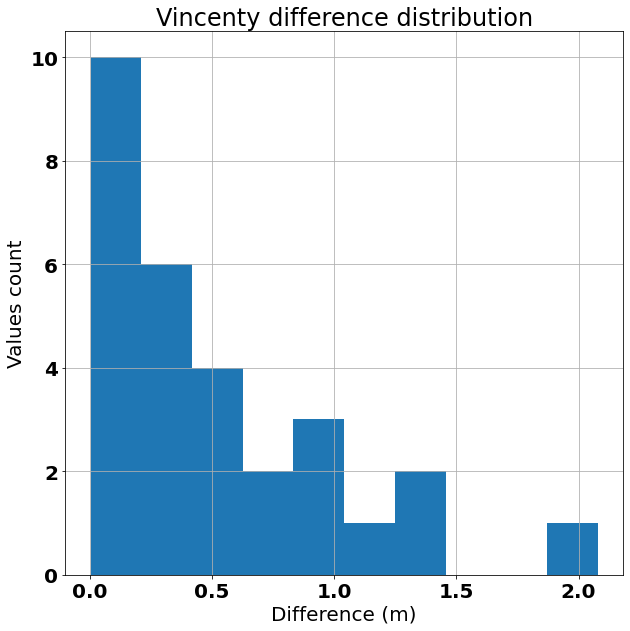

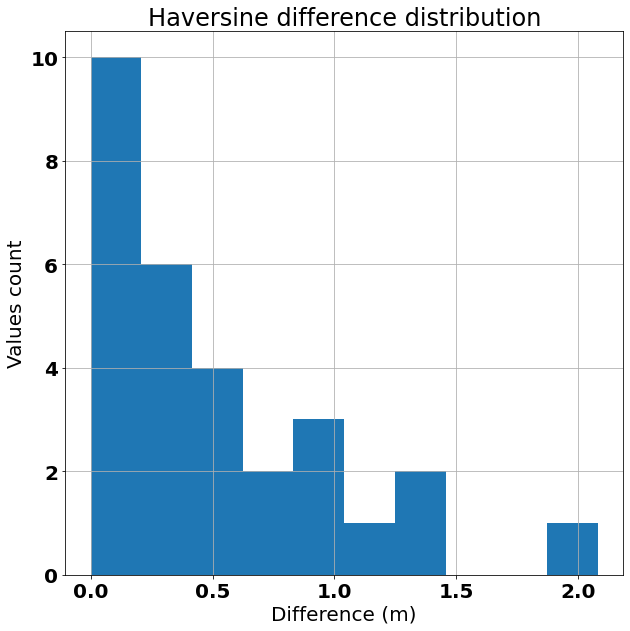

In [89]:
# Data distribution / histograms
font = {'size': 20}
matplotlib.rc('font', **font)

df_final['Vincenty difference distribution'] = df_final['m_difference_vincenty']
df_final.hist(column=['Vincenty difference distribution'], figsize=(10, 10))
plt.ylabel('Values count')
plt.xlabel('Difference (m)')

df_final['Haversine difference distribution'] = df_final['m_difference_haversine']
df_final.hist(column=['Haversine difference distribution'], figsize=(10, 10))
plt.ylabel('Values count')
plt.xlabel('Difference (m)')

In [359]:
font = {'family' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

# marker = 'o'
# colors = ('red', 'green')
# cmap = ListedColormap(colors[:2])


# fig = plt.figure(figsize=(10,10))

# plt.scatter(x=df_final[f'long1'], 
#             y=df_final[f'lat1'],
#             alpha=0.6, 
#             c=[cmap(0)],
#             marker=marker, 
#             label='Predicted')

# plt.scatter(x=df_final[f'long2'], 
#             y=df_final[f'lat2'],
#             alpha=0.6, 
#             c=[cmap(1)],
#             marker=marker, 
#             label='Real')


# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend(loc='upper right')
# plt.tight_layout()



import time
import ipywidgets as widgets

# fig = plt.figure(figsize=(10,10))

def plot_with_steps(row):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(loc='upper right')
#     plt.ylim(-0.2, 1.2)
#     plt.xlim(26.0477, 26.0479)
    plt.scatter(x=df_final.iloc[:row, 1], 
               y=df_final.iloc[:row, 0],
               color='black', 
               label='Real')
    plt.scatter(x=df_final.iloc[:row, 3], 
               y=df_final.iloc[:row, 2],
               color='red', 
               label='Predicted')

for i in range(0,len(df_final)):
    button = widgets.interact(plot_with_steps, row=i)
    output = widgets.Output()

    display(button, output)
    time.sleep(0.1)
    clear_output(wait=True)


interactive(children=(IntSlider(value=28, description='row', max=84, min=-28), Output()), _dom_classes=('widge…

<function __main__.plot_with_steps(row)>

Output()